## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [1]:
!pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 28.2 MB/s eta 0:00:00


In [2]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.12.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [3]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 21.2 MB/s eta 0:00:00


In [4]:
from datasets import load_dataset
dataset = load_dataset("emotion")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
train = dataset["train"]
test = dataset["test"]
val = dataset["validation"]

In [7]:
def gettweet(data):
  tweet = [ x['text'] for x in data]
  emotion = [x['label'] for x in data]
  return tweet, emotion

In [8]:
tweet, emotion = gettweet(train)
tweet[0], emotion[0]

('i didnt feel humiliated', 0)

## Task 4: Tokenizer

1. Tokenizing the tweets

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [10]:
tokenizer = Tokenizer(num_words=10000, oov_token="<UVW>")
tokenizer.fit_on_texts(tweet)

In [11]:
tweet[0]

'i didnt feel humiliated'

In [12]:
tokenizer.texts_to_sequences([tweet[0]])

[[2, 139, 3, 679]]

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

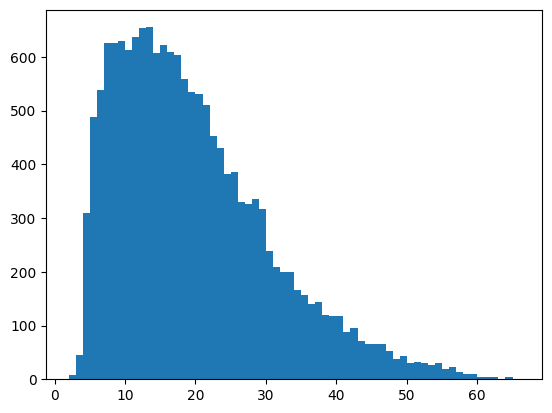

In [13]:
lengths = [len(x.split(" ")) for x in tweet]
plt.hist(lengths, bins = len(set(lengths)))
plt.show()

In [14]:
maxlength = 50
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
def get_sequences(tokenizer,tweet):
  seq = tokenizer.texts_to_sequences(tweet)
  padded = pad_sequences(seq,truncating = "post", padding = "post", maxlen=50)
  return padded

In [16]:
pad_train = get_sequences(tokenizer,tweet)
pad_train[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [17]:
classes = set(emotion)
print(classes)

{0, 1, 2, 3, 4, 5}


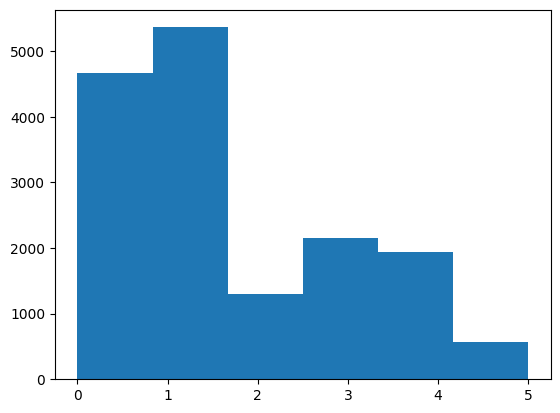

In [18]:
plt.hist(emotion, bins = 6)
plt.show()

In [19]:
index_to_class = dict({0:"sadness",1:"joy",2:"love",3:"anger",4:"fear",5:"surprise"})

In [20]:
index_to_class

{0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

In [21]:
class_to_index = dict((v,i) for i,v in enumerate(index_to_class.values()) )

In [22]:
class_to_index

{'sadness': 0, 'joy': 1, 'love': 2, 'anger': 3, 'fear': 4, 'surprise': 5}

In [23]:
train_labels = np.array(emotion)

In [24]:
train_labels

array([0, 0, 3, ..., 1, 3, 0])

## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(1000,16,input_length = maxlength),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation = "softmax")
])
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            16000     
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 31,926
Trainable params: 31,926
Non-trainable params: 0
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [27]:
val_tweet,val_label = gettweet(val)

In [28]:
val_tweet[0],val_label[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [29]:
val_seq = get_sequences(tokenizer,val_tweet)

In [30]:
val_seq[0]

array([ 17,   8, 157, 260,   4, 343,  16,  51,  19, 212,   1,  50,  10,
        13, 533,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

In [31]:
h = model.fit(
    pad_train,train_labels,
    validation_data = (val_seq,np.array(val_label)),
    epochs=20,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=2)]
)

Epoch 1/20
500/500 [==============================] - 45s 67ms/step - loss: 1.3164 - accuracy: 0.4797 - val_loss: 0.8285 - val_accuracy: 0.6935
Epoch 2/20
500/500 [==============================] - 10s 20ms/step - loss: 0.6979 - accuracy: 0.7372 - val_loss: 0.6206 - val_accuracy: 0.7845
Epoch 3/20
500/500 [==============================] - 7s 14ms/step - loss: 0.5146 - accuracy: 0.8298 - val_loss: 0.4774 - val_accuracy: 0.8450
Epoch 4/20
500/500 [==============================] - 8s 16ms/step - loss: 0.4071 - accuracy: 0.8618 - val_loss: 0.4533 - val_accuracy: 0.8515
Epoch 5/20
500/500 [==============================] - 9s 17ms/step - loss: 0.3477 - accuracy: 0.8779 - val_loss: 0.4567 - val_accuracy: 0.8515
Epoch 6/20
500/500 [==============================] - 7s 14ms/step - loss: 0.3283 - accuracy: 0.8839 - val_loss: 0.4075 - val_accuracy: 0.8590
Epoch 7/20
500/500 [==============================] - 8s 17ms/step - loss: 0.2946 - accuracy: 0.8941 - val_loss: 0.3795 - val_accuracy: 0.86

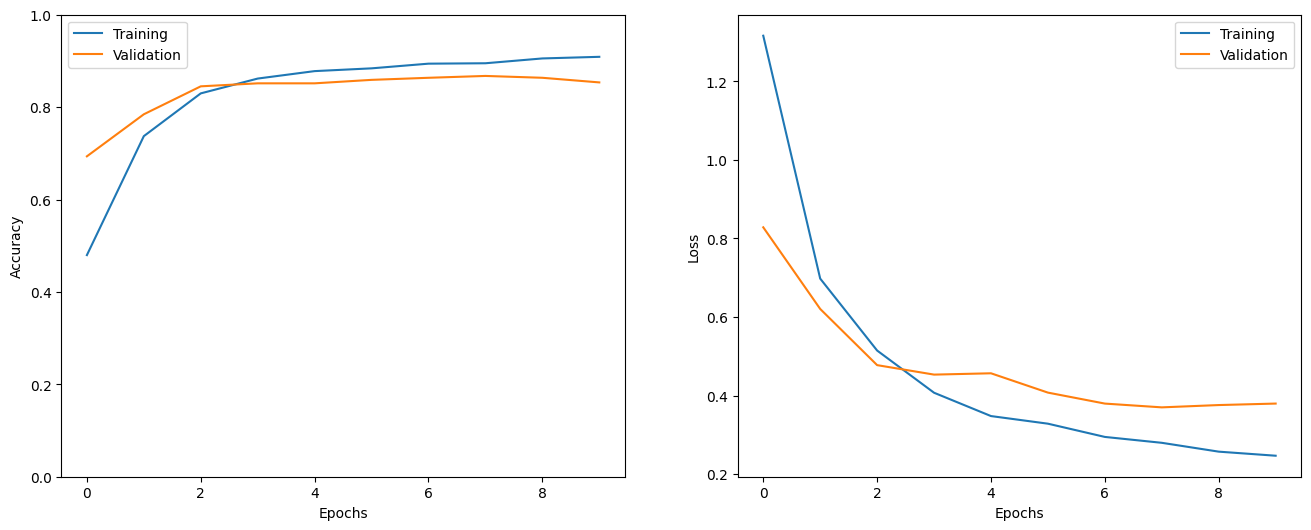

In [32]:
show_history(h)

In [33]:
test_tweet, test_label = gettweet(test)
test_seq = get_sequences(tokenizer,test_tweet)
test_labels=np.array(test_label)

In [34]:
_ = model.evaluate(test_seq,test_labels)

63/63 [==============================] - 0s 7ms/step - loss: 0.3561 - accuracy: 0.8680


In [35]:
i = random.randint(0,len(test_labels)-1)
print("sentence:",test_tweet[i])
print("emotion:",index_to_class[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i],axis = 0))[0]
pred_class = index_to_class[np.argmax(p).astype("uint8")]

print("predicted emotion : ",pred_class)

sentence: ive also been for a run which im feeling particularly virtuous about
emotion: joy
1/1 [==============================] - 1s 1s/step
predicted emotion :  joy


In [36]:
pred = model.predict(test_seq)

63/63 [==============================] - 0s 6ms/step


In [37]:
pred_class_new = list()
for x in pred:
  pred_class_new.append(index_to_class[np.argmax(x).astype("uint8")]) 

In [38]:
pred_class_new

['sadness',
 'sadness',
 'sadness',
 'joy',
 'sadness',
 'fear',
 'anger',
 'joy',
 'joy',
 'anger',
 'anger',
 'sadness',
 'fear',
 'joy',
 'love',
 'sadness',
 'joy',
 'sadness',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'fear',
 'sadness',
 'sadness',
 'fear',
 'anger',
 'fear',
 'anger',
 'sadness',
 'anger',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'sadness',
 'joy',
 'anger',
 'joy',
 'joy',
 'fear',
 'fear',
 'sadness',
 'fear',
 'joy',
 'sadness',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'sadness',
 'anger',
 'sadness',
 'sadness',
 'surprise',
 'joy',
 'sadness',
 'sadness',
 'sadness',
 'anger',
 'fear',
 'surprise',
 'sadness',
 'love',
 'fear',
 'joy',
 'joy',
 'anger',
 'sadness',
 'sadness',
 'joy',
 'love',
 'joy',
 'anger',
 'sadness',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'joy',
 'joy',
 'sadness',
 'joy',
 'fear',
 'anger',
 'fear',
 'anger',
 'anger',
 'joy',
 'sadness',
 'anger',
 'joy',
 's

In [53]:
test_labels_new = list()
for x in test_label:
  test_labels_new.append(index_to_class[x])

In [55]:
test_labels_new

['sadness',
 'sadness',
 'sadness',
 'joy',
 'sadness',
 'fear',
 'anger',
 'joy',
 'joy',
 'anger',
 'fear',
 'sadness',
 'fear',
 'joy',
 'love',
 'sadness',
 'joy',
 'sadness',
 'anger',
 'joy',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'fear',
 'anger',
 'sadness',
 'fear',
 'anger',
 'fear',
 'anger',
 'sadness',
 'anger',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'joy',
 'joy',
 'anger',
 'sadness',
 'joy',
 'sadness',
 'joy',
 'anger',
 'joy',
 'joy',
 'fear',
 'fear',
 'sadness',
 'fear',
 'joy',
 'sadness',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'sadness',
 'anger',
 'sadness',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'surprise',
 'sadness',
 'anger',
 'fear',
 'surprise',
 'joy',
 'love',
 'surprise',
 'joy',
 'love',
 'anger',
 'joy',
 'sadness',
 'joy',
 'love',
 'joy',
 'anger',
 'sadness',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'joy',
 'joy',
 'sadness',
 'joy',
 'fear',
 'anger',
 'fear',
 'anger',
 'anger',
 'love',
 'sadness',
 'anger',
 'sadness',
 'sadn

In [71]:
classes_new = list()
for x in classes:
  classes_new.append(index_to_class[x])

In [72]:
classes_new

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

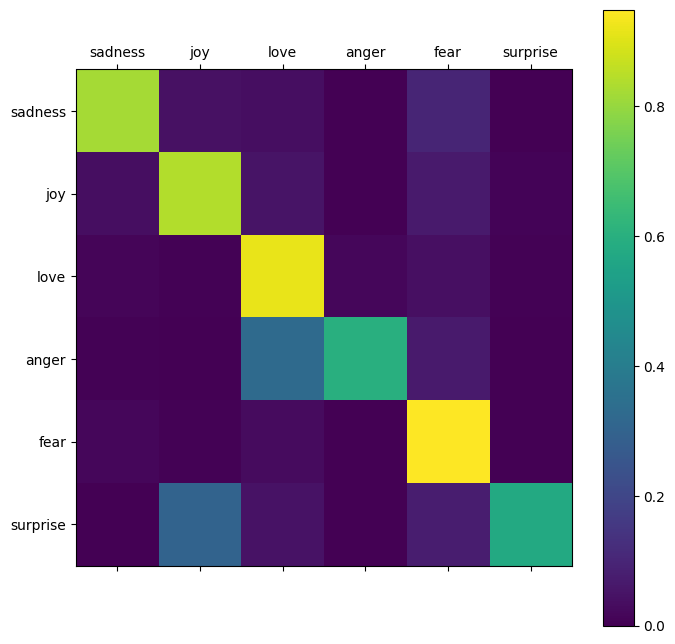

In [73]:
show_confusion_matrix(test_labels_new,pred_class_new,classes_new)